<a href="https://colab.research.google.com/github/abdipourasl/Machine-Learning-1402/blob/main/ML4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-success">
<h1>Machine Learning Project #4<h1>
Amin Abdipour 401133011</h1>
</div>

# Regressor Decision Tree

##  ***Without Pruning***

### 1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import os.path as op
import sklearn
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Import  Data

In [ ]:
dir = op.join('/content/drive/My Drive/','ML','MELBOURNE_HOUSE_PRICES_LESS.xls')  # Path to the Data folder
data = pd.read_excel(dir, sheet_name='MELBOURNE_HOUSE_PRICES_LESS')
print('data type: ', type(data))
data

data type:  <class 'pandas.core.frame.DataFrame'>


Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford     49 Lithgow St      3    h  1490000.0      S   
1         Abbotsford     59A Turner St      3    h  1220000.0      S   
2         Abbotsford     119B Yarra St      3    h  1420000.0      S   
3         Aberfeldie        68 Vida St      3    h  1515000.0      S   
4       Airport West  92 Clydesdale Rd      2    h   670000.0      S   
...              ...               ...    ...  ...        ...    ...   
16378        Vermont      16 Morack Rd      3    h   831000.0      S   
16379  Vermont South   28 Fortescue Gr      5    h  1658000.0      S   
16380  Vermont South        2 Moran Ct      4    h  1160000.0      S   
16381  Vermont South       1 Sewart Cl      4    h        NaN     PN   
16382  Vermont South     126 Weeden Dr      4    h  1142000.0      S   

         SellerG       Date  Postcode             Regionname  Propertycount  \
0         Jellis 2017-01-04      3067  Northern Metropolitan           4019   
1       Marshall 2017-01-04      3067  Northern Metropolitan           4019   
2         Nelson 2017-01-04      3067  Northern Metropolitan           4019   
3          Barry 2017-01-04      3040   Western Metropolitan           1543   
4         Nelson 2017-01-04      3042   Western Metropolitan           3464   
...          ...        ...       ...                    ...            ...   
16378  Fletchers 2016-08-10      3133   Eastern Metropolitan           4181   
16379        Ray 2016-08-10      3133   Eastern Metropolitan           4280   
16380    McGrath 2016-08-10      3133   Eastern Metropolitan           4280   
16381  Harcourts 2016-08-10      3133   Eastern Metropolitan           4280   
16382     Jellis 2016-08-10      3133   Eastern Metropolitan           4280   

       Distance                 CouncilArea  
0           3.0          Yarra City Council  
1           3.0          Yarra City Council  
2           3.0          Yarra City Council  
3           7.5  Moonee Valley City Council  
4          10.4  Moonee Valley City Council  
...         ...                         ...  
16378      17.2      Maroondah City Council  
16379      17.2     Whitehorse City Council  
16380      17.2     Whitehorse City Council  
16381      17.2     Whitehorse City Council  
16382      17.2     Whitehorse City Council  

[16383 rows x 13 columns]

### 3. Prepare Data

In [ ]:
columns_to_drop = ['Suburb', 'Address', 'SellerG','Postcode','Date']
data = data.drop(columns=columns_to_drop)

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()


In [18]:
data.describe()

Rooms         Price  Propertycount      Distance
count  16383.000000  1.257100e+04   16383.000000  16383.000000
mean       3.099127  9.767911e+05    7632.868888     12.757963
std        0.957242  5.748996e+05    4451.860526      7.602112
min        1.000000  8.500000e+04      39.000000      0.000000
25%        3.000000  6.100000e+05    4294.000000      7.000000
50%        3.000000  8.200000e+05    6786.000000     11.700000
75%        4.000000  1.200000e+06   10412.000000     16.700000
max       12.000000  6.700000e+06   21650.000000     48.100000

In [ ]:
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target variable
X

Rooms Type Method             Regionname  Propertycount  Distance  \
0          3    h      S  Northern Metropolitan           4019       3.0   
1          3    h      S  Northern Metropolitan           4019       3.0   
2          3    h      S  Northern Metropolitan           4019       3.0   
3          3    h      S   Western Metropolitan           1543       7.5   
4          2    h      S   Western Metropolitan           3464      10.4   
...      ...  ...    ...                    ...            ...       ...   
16378      3    h      S   Eastern Metropolitan           4181      17.2   
16379      5    h      S   Eastern Metropolitan           4280      17.2   
16380      4    h      S   Eastern Metropolitan           4280      17.2   
16381      4    h     PN   Eastern Metropolitan           4280      17.2   
16382      4    h      S   Eastern Metropolitan           4280      17.2   

                      CouncilArea  
0              Yarra City Council  
1              Yarra City Council  
2              Yarra City Council  
3      Moonee Valley City Council  
4      Moonee Valley City Council  
...                           ...  
16378      Maroondah City Council  
16379     Whitehorse City Council  
16380     Whitehorse City Council  
16381     Whitehorse City Council  
16382     Whitehorse City Council  

[16383 rows x 7 columns]

In [ ]:
y = y.fillna(y.mean())

In [ ]:
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

### 3. Split Data

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
preprocessor = sklearn.compose.ColumnTransformer(
    transformers=[('cat', sklearn.preprocessing.OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

### 4. Train

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.pipeline import Pipeline

model = sklearn.pipeline.Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])


In [ ]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Type', 'Method',
                                                   'Regionname',
                                                   'CouncilArea'])])),
                ('regressor', DecisionTreeRegressor())])

### 5. Evaluate Model

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# from sklearn.metrics import mean_squared_error, r2_score

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
r2 = sklearn.metrics.r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 166048565318.65817
R-squared: 0.4031650645081618


### 6. Visualize Decision Tree

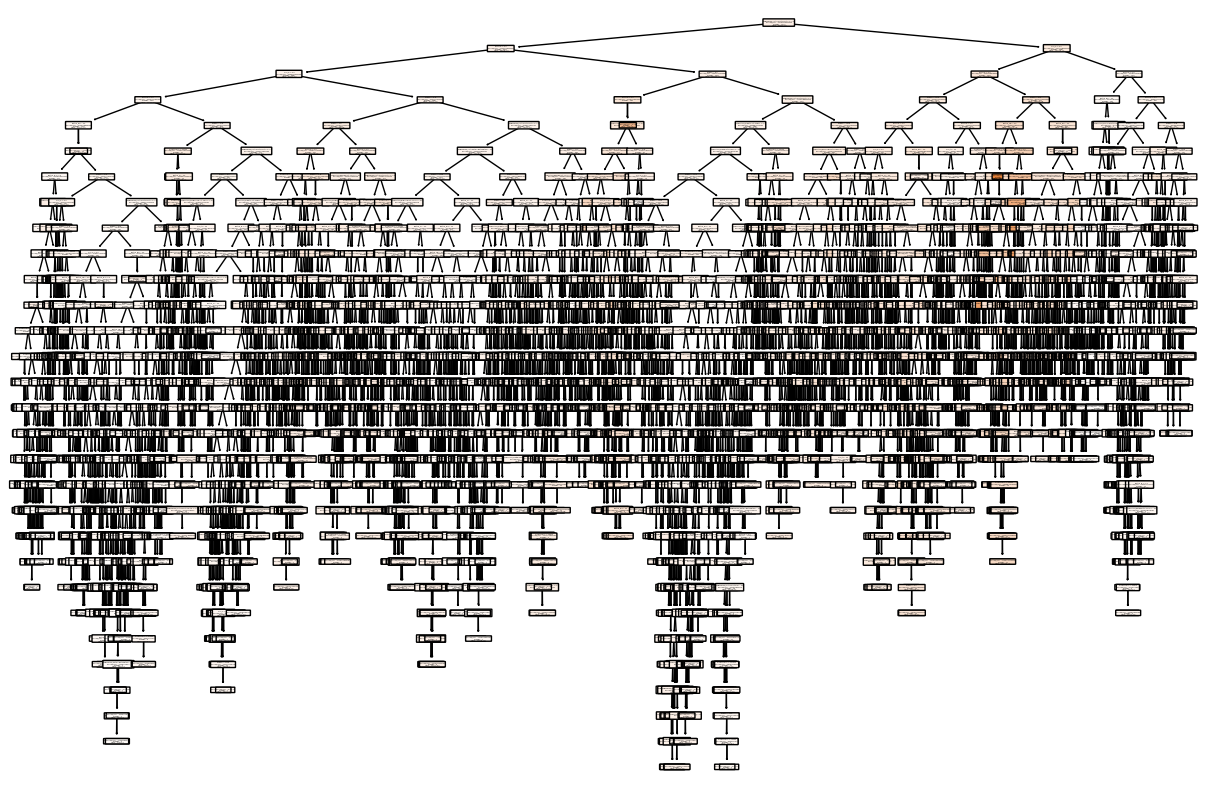

In [ ]:
# from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
# Extract the decision tree from the pipeline
tree = model.named_steps['regressor']

# Extract feature names after one-hot encoding
categorical_feature_names_out = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
all_feature_names = list(categorical_feature_names_out) + list(X.columns.difference(categorical_columns))

plot_tree(tree, feature_names=all_feature_names, filled=True, rounded=True)
plt.show()

##  ***With Complexity Pruning alpha = 0.01***

### 1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import os.path as op
import sklearn
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Import  Data

In [ ]:
dir = op.join('/content/drive/My Drive/','ML','MELBOURNE_HOUSE_PRICES_LESS.xls')  # Path to the Data folder
data = pd.read_excel(dir, sheet_name='MELBOURNE_HOUSE_PRICES_LESS')
print('data type: ', type(data))
data

data type:  <class 'pandas.core.frame.DataFrame'>


Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford     49 Lithgow St      3    h  1490000.0      S   
1         Abbotsford     59A Turner St      3    h  1220000.0      S   
2         Abbotsford     119B Yarra St      3    h  1420000.0      S   
3         Aberfeldie        68 Vida St      3    h  1515000.0      S   
4       Airport West  92 Clydesdale Rd      2    h   670000.0      S   
...              ...               ...    ...  ...        ...    ...   
16378        Vermont      16 Morack Rd      3    h   831000.0      S   
16379  Vermont South   28 Fortescue Gr      5    h  1658000.0      S   
16380  Vermont South        2 Moran Ct      4    h  1160000.0      S   
16381  Vermont South       1 Sewart Cl      4    h        NaN     PN   
16382  Vermont South     126 Weeden Dr      4    h  1142000.0      S   

         SellerG       Date  Postcode             Regionname  Propertycount  \
0         Jellis 2017-01-04      3067  Northern Metropolitan           4019   
1       Marshall 2017-01-04      3067  Northern Metropolitan           4019   
2         Nelson 2017-01-04      3067  Northern Metropolitan           4019   
3          Barry 2017-01-04      3040   Western Metropolitan           1543   
4         Nelson 2017-01-04      3042   Western Metropolitan           3464   
...          ...        ...       ...                    ...            ...   
16378  Fletchers 2016-08-10      3133   Eastern Metropolitan           4181   
16379        Ray 2016-08-10      3133   Eastern Metropolitan           4280   
16380    McGrath 2016-08-10      3133   Eastern Metropolitan           4280   
16381  Harcourts 2016-08-10      3133   Eastern Metropolitan           4280   
16382     Jellis 2016-08-10      3133   Eastern Metropolitan           4280   

       Distance                 CouncilArea  
0           3.0          Yarra City Council  
1           3.0          Yarra City Council  
2           3.0          Yarra City Council  
3           7.5  Moonee Valley City Council  
4          10.4  Moonee Valley City Council  
...         ...                         ...  
16378      17.2      Maroondah City Council  
16379      17.2     Whitehorse City Council  
16380      17.2     Whitehorse City Council  
16381      17.2     Whitehorse City Council  
16382      17.2     Whitehorse City Council  

[16383 rows x 13 columns]

### 3. Prepare Data

In [ ]:
columns_to_drop = ['Suburb', 'Address', 'SellerG','Postcode','Date']
data = data.drop(columns=columns_to_drop)

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()


In [ ]:
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target variable
X

Rooms Type Method             Regionname  Propertycount  Distance  \
0          3    h      S  Northern Metropolitan           4019       3.0   
1          3    h      S  Northern Metropolitan           4019       3.0   
2          3    h      S  Northern Metropolitan           4019       3.0   
3          3    h      S   Western Metropolitan           1543       7.5   
4          2    h      S   Western Metropolitan           3464      10.4   
...      ...  ...    ...                    ...            ...       ...   
16378      3    h      S   Eastern Metropolitan           4181      17.2   
16379      5    h      S   Eastern Metropolitan           4280      17.2   
16380      4    h      S   Eastern Metropolitan           4280      17.2   
16381      4    h     PN   Eastern Metropolitan           4280      17.2   
16382      4    h      S   Eastern Metropolitan           4280      17.2   

                      CouncilArea  
0              Yarra City Council  
1              Yarra City Council  
2              Yarra City Council  
3      Moonee Valley City Council  
4      Moonee Valley City Council  
...                           ...  
16378      Maroondah City Council  
16379     Whitehorse City Council  
16380     Whitehorse City Council  
16381     Whitehorse City Council  
16382     Whitehorse City Council  

[16383 rows x 7 columns]

In [ ]:
y = y.fillna(y.mean())

In [ ]:
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

### 3. Split Data

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
preprocessor = sklearn.compose.ColumnTransformer(
    transformers=[('cat', sklearn.preprocessing.OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

### 4. Train

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.pipeline import Pipeline

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(ccp_alpha=0.01))  # Adjust ccp_alpha as needed
])


Train the model


In [ ]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Type', 'Method',
                                                   'Regionname',
                                                   'CouncilArea'])])),
                ('regressor', DecisionTreeRegressor(ccp_alpha=0.01))])

### 5. Evaluate Model

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# from sklearn.metrics import mean_squared_error, r2_score

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
r2 = sklearn.metrics.r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 166444314779.43878
R-squared: 0.4017426065456817


### 6. Visualize Decision Tree

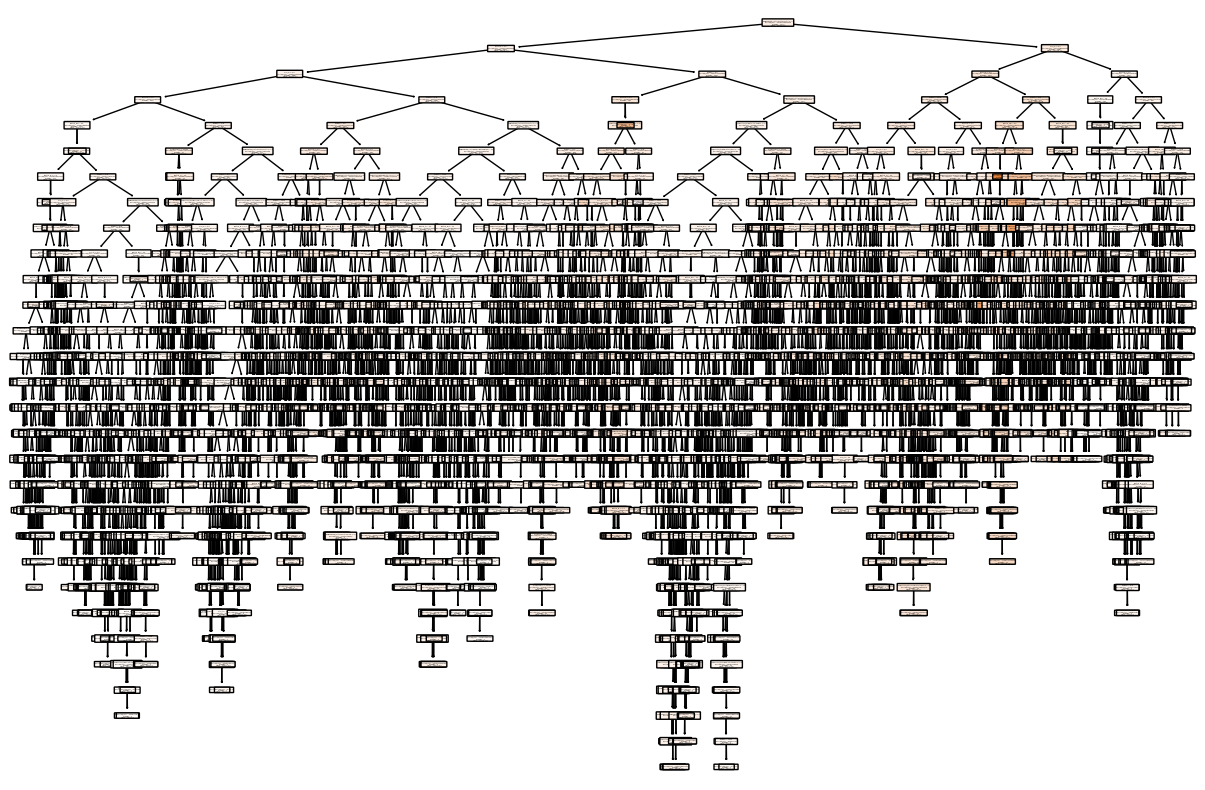

In [ ]:
# from sklearn.tree import plot_tree

# Visualize Pruned Decision Tree
plt.figure(figsize=(15, 10))
# Extract the decision tree from the pipeline
tree = model.named_steps['regressor']

# Extract feature names after one-hot encoding
categorical_feature_names_out = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
all_feature_names = list(categorical_feature_names_out) + list(X.columns.difference(categorical_columns))

plot_tree(tree, feature_names=all_feature_names, filled=True, rounded=True)
plt.show()

##  ***With Pruning alpha = 0.1***

### 1. Importing Libraries

In [19]:
import numpy as np
import pandas as pd
import os
import os.path as op
import sklearn
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Import  Data

In [20]:
dir = op.join('/content/drive/My Drive/','ML','MELBOURNE_HOUSE_PRICES_LESS.xls')  # Path to the Data folder
data = pd.read_excel(dir, sheet_name='MELBOURNE_HOUSE_PRICES_LESS')
print('data type: ', type(data))
data

data type:  <class 'pandas.core.frame.DataFrame'>


Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford     49 Lithgow St      3    h  1490000.0      S   
1         Abbotsford     59A Turner St      3    h  1220000.0      S   
2         Abbotsford     119B Yarra St      3    h  1420000.0      S   
3         Aberfeldie        68 Vida St      3    h  1515000.0      S   
4       Airport West  92 Clydesdale Rd      2    h   670000.0      S   
...              ...               ...    ...  ...        ...    ...   
16378        Vermont      16 Morack Rd      3    h   831000.0      S   
16379  Vermont South   28 Fortescue Gr      5    h  1658000.0      S   
16380  Vermont South        2 Moran Ct      4    h  1160000.0      S   
16381  Vermont South       1 Sewart Cl      4    h        NaN     PN   
16382  Vermont South     126 Weeden Dr      4    h  1142000.0      S   

         SellerG       Date  Postcode             Regionname  Propertycount  \
0         Jellis 2017-01-04      3067  Northern Metropolitan           4019   
1       Marshall 2017-01-04      3067  Northern Metropolitan           4019   
2         Nelson 2017-01-04      3067  Northern Metropolitan           4019   
3          Barry 2017-01-04      3040   Western Metropolitan           1543   
4         Nelson 2017-01-04      3042   Western Metropolitan           3464   
...          ...        ...       ...                    ...            ...   
16378  Fletchers 2016-08-10      3133   Eastern Metropolitan           4181   
16379        Ray 2016-08-10      3133   Eastern Metropolitan           4280   
16380    McGrath 2016-08-10      3133   Eastern Metropolitan           4280   
16381  Harcourts 2016-08-10      3133   Eastern Metropolitan           4280   
16382     Jellis 2016-08-10      3133   Eastern Metropolitan           4280   

       Distance                 CouncilArea  
0           3.0          Yarra City Council  
1           3.0          Yarra City Council  
2           3.0          Yarra City Council  
3           7.5  Moonee Valley City Council  
4          10.4  Moonee Valley City Council  
...         ...                         ...  
16378      17.2      Maroondah City Council  
16379      17.2     Whitehorse City Council  
16380      17.2     Whitehorse City Council  
16381      17.2     Whitehorse City Council  
16382      17.2     Whitehorse City Council  

[16383 rows x 13 columns]

### 3. Prepare Data

In [21]:
columns_to_drop = ['Suburb', 'Address', 'SellerG','Postcode','Date']
data = data.drop(columns=columns_to_drop)

In [22]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()


In [23]:
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target variable
X

Rooms Type Method             Regionname  Propertycount  Distance  \
0          3    h      S  Northern Metropolitan           4019       3.0   
1          3    h      S  Northern Metropolitan           4019       3.0   
2          3    h      S  Northern Metropolitan           4019       3.0   
3          3    h      S   Western Metropolitan           1543       7.5   
4          2    h      S   Western Metropolitan           3464      10.4   
...      ...  ...    ...                    ...            ...       ...   
16378      3    h      S   Eastern Metropolitan           4181      17.2   
16379      5    h      S   Eastern Metropolitan           4280      17.2   
16380      4    h      S   Eastern Metropolitan           4280      17.2   
16381      4    h     PN   Eastern Metropolitan           4280      17.2   
16382      4    h      S   Eastern Metropolitan           4280      17.2   

                      CouncilArea  
0              Yarra City Council  
1              Yarra City Council  
2              Yarra City Council  
3      Moonee Valley City Council  
4      Moonee Valley City Council  
...                           ...  
16378      Maroondah City Council  
16379     Whitehorse City Council  
16380     Whitehorse City Council  
16381     Whitehorse City Council  
16382     Whitehorse City Council  

[16383 rows x 7 columns]

In [24]:
y = y.fillna(y.mean())

In [25]:
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

### 3. Split Data

In [26]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
preprocessor = sklearn.compose.ColumnTransformer(
    transformers=[('cat', sklearn.preprocessing.OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

### 4. Train

In [28]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.pipeline import Pipeline

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(ccp_alpha=0.1))  # Adjust ccp_alpha as needed
])


Train the model


In [29]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Type', 'Method',
                                                   'Regionname',
                                                   'CouncilArea'])])),
                ('regressor', DecisionTreeRegressor(ccp_alpha=0.1))])

### 5. Evaluate Model

In [30]:
y_pred = model.predict(X_test)

In [31]:
# from sklearn.metrics import mean_squared_error, r2_score

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
r2 = sklearn.metrics.r2_score(y_test, y_pred)

In [32]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 162665103757.66632
R-squared: 0.4153263744154073


### 6. Visualize Decision Tree

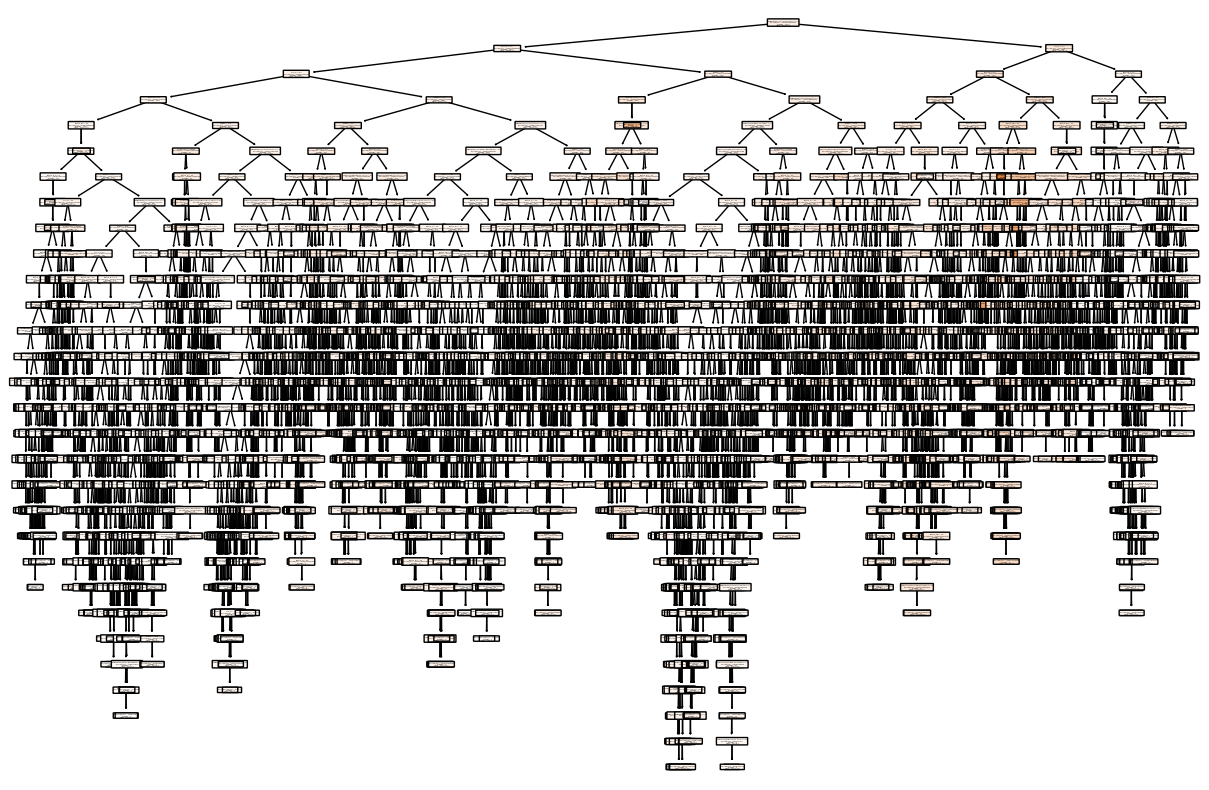

In [33]:
# from sklearn.tree import plot_tree

# Visualize Pruned Decision Tree
plt.figure(figsize=(15, 10))
# Extract the decision tree from the pipeline
tree = model.named_steps['regressor']

# Extract feature names after one-hot encoding
categorical_feature_names_out = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
all_feature_names = list(categorical_feature_names_out) + list(X.columns.difference(categorical_columns))

plot_tree(tree, feature_names=all_feature_names, filled=True, rounded=True)
plt.show()

##  ***With Pruning alpha = 0.01 & Smaller Tree***

### 1. Importing Libraries

In [57]:
import numpy as np
import pandas as pd
import os
import os.path as op
import sklearn
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Import  Data

In [58]:
dir = op.join('/content/drive/My Drive/','ML','MELBOURNE_HOUSE_PRICES_LESS.xls')  # Path to the Data folder
data = pd.read_excel(dir, sheet_name='MELBOURNE_HOUSE_PRICES_LESS')
print('data type: ', type(data))
data

data type:  <class 'pandas.core.frame.DataFrame'>


Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford     49 Lithgow St      3    h  1490000.0      S   
1         Abbotsford     59A Turner St      3    h  1220000.0      S   
2         Abbotsford     119B Yarra St      3    h  1420000.0      S   
3         Aberfeldie        68 Vida St      3    h  1515000.0      S   
4       Airport West  92 Clydesdale Rd      2    h   670000.0      S   
...              ...               ...    ...  ...        ...    ...   
16378        Vermont      16 Morack Rd      3    h   831000.0      S   
16379  Vermont South   28 Fortescue Gr      5    h  1658000.0      S   
16380  Vermont South        2 Moran Ct      4    h  1160000.0      S   
16381  Vermont South       1 Sewart Cl      4    h        NaN     PN   
16382  Vermont South     126 Weeden Dr      4    h  1142000.0      S   

         SellerG       Date  Postcode             Regionname  Propertycount  \
0         Jellis 2017-01-04      3067  Northern Metropolitan           4019   
1       Marshall 2017-01-04      3067  Northern Metropolitan           4019   
2         Nelson 2017-01-04      3067  Northern Metropolitan           4019   
3          Barry 2017-01-04      3040   Western Metropolitan           1543   
4         Nelson 2017-01-04      3042   Western Metropolitan           3464   
...          ...        ...       ...                    ...            ...   
16378  Fletchers 2016-08-10      3133   Eastern Metropolitan           4181   
16379        Ray 2016-08-10      3133   Eastern Metropolitan           4280   
16380    McGrath 2016-08-10      3133   Eastern Metropolitan           4280   
16381  Harcourts 2016-08-10      3133   Eastern Metropolitan           4280   
16382     Jellis 2016-08-10      3133   Eastern Metropolitan           4280   

       Distance                 CouncilArea  
0           3.0          Yarra City Council  
1           3.0          Yarra City Council  
2           3.0          Yarra City Council  
3           7.5  Moonee Valley City Council  
4          10.4  Moonee Valley City Council  
...         ...                         ...  
16378      17.2      Maroondah City Council  
16379      17.2     Whitehorse City Council  
16380      17.2     Whitehorse City Council  
16381      17.2     Whitehorse City Council  
16382      17.2     Whitehorse City Council  

[16383 rows x 13 columns]

### 3. Prepare Data

In [59]:
columns_to_drop = ['Suburb', 'Address', 'SellerG','Postcode','Date']
data = data.drop(columns=columns_to_drop)

In [60]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [61]:
data.describe()

Rooms         Price  Propertycount      Distance
count  16383.000000  1.257100e+04   16383.000000  16383.000000
mean       3.099127  9.767911e+05    7632.868888     12.757963
std        0.957242  5.748996e+05    4451.860526      7.602112
min        1.000000  8.500000e+04      39.000000      0.000000
25%        3.000000  6.100000e+05    4294.000000      7.000000
50%        3.000000  8.200000e+05    6786.000000     11.700000
75%        4.000000  1.200000e+06   10412.000000     16.700000
max       12.000000  6.700000e+06   21650.000000     48.100000

In [62]:
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target variable
X

Rooms Type Method             Regionname  Propertycount  Distance  \
0          3    h      S  Northern Metropolitan           4019       3.0   
1          3    h      S  Northern Metropolitan           4019       3.0   
2          3    h      S  Northern Metropolitan           4019       3.0   
3          3    h      S   Western Metropolitan           1543       7.5   
4          2    h      S   Western Metropolitan           3464      10.4   
...      ...  ...    ...                    ...            ...       ...   
16378      3    h      S   Eastern Metropolitan           4181      17.2   
16379      5    h      S   Eastern Metropolitan           4280      17.2   
16380      4    h      S   Eastern Metropolitan           4280      17.2   
16381      4    h     PN   Eastern Metropolitan           4280      17.2   
16382      4    h      S   Eastern Metropolitan           4280      17.2   

                      CouncilArea  
0              Yarra City Council  
1              Yarra City Council  
2              Yarra City Council  
3      Moonee Valley City Council  
4      Moonee Valley City Council  
...                           ...  
16378      Maroondah City Council  
16379     Whitehorse City Council  
16380     Whitehorse City Council  
16381     Whitehorse City Council  
16382     Whitehorse City Council  

[16383 rows x 7 columns]

In [63]:
y = y.fillna(y.mean())

In [64]:
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

### 3. Split Data

In [65]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
preprocessor = sklearn.compose.ColumnTransformer(
    transformers=[('cat', sklearn.preprocessing.OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

### 4. Train

In [67]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.pipeline import Pipeline

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(ccp_alpha=0.01,max_depth =10, max_leaf_nodes=10))  # Adjust ccp_alpha as needed
])


Train the model


In [68]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Type', 'Method',
                                                   'Regionname',
                                                   'CouncilArea'])])),
                ('regressor',
                 DecisionTreeRegressor(ccp_alpha=0.01, max_depth=10,
                                       max_leaf_nodes=10))])

### 5. Evaluate Model

In [69]:
y_pred = model.predict(X_test)

In [70]:
# from sklearn.metrics import mean_squared_error, r2_score

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
r2 = sklearn.metrics.r2_score(y_test, y_pred)

In [71]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 178820821399.05643
R-squared: 0.35725723857060665


### 6. Visualize Decision Tree

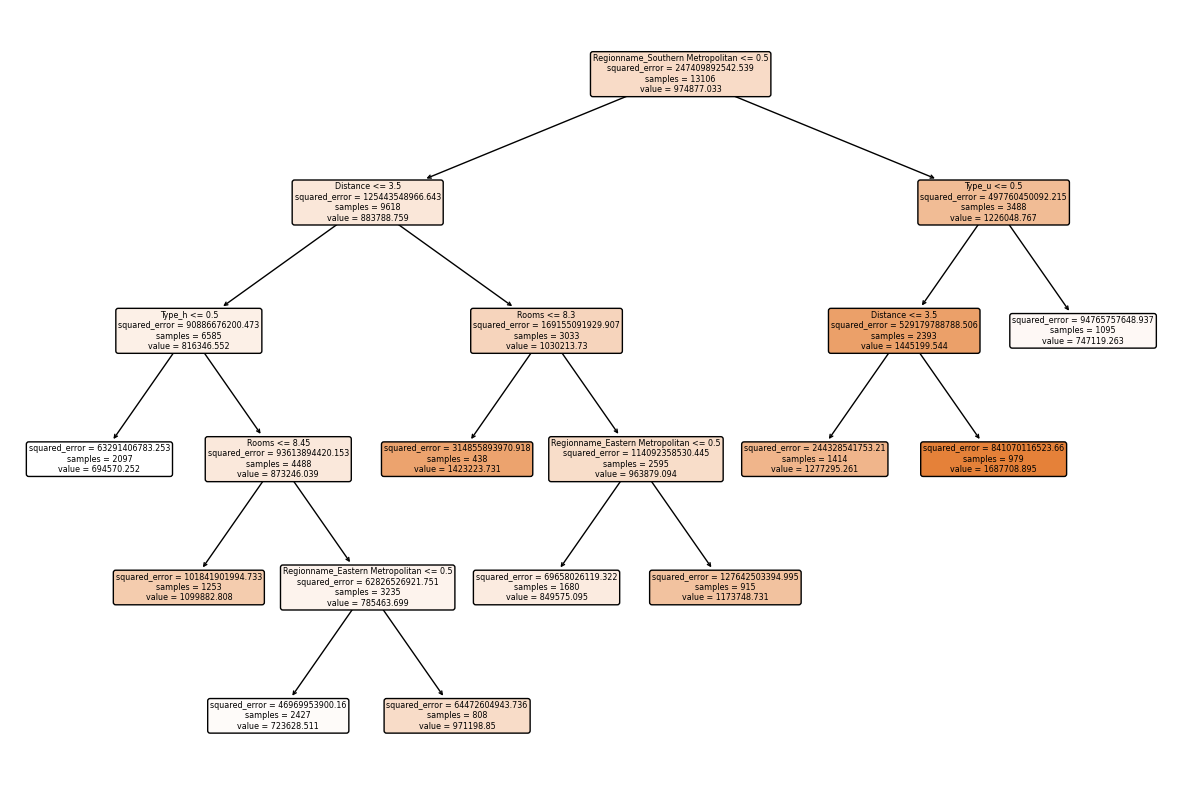

In [72]:
# from sklearn.tree import plot_tree

# Visualize Pruned Decision Tree
plt.figure(figsize=(15, 10))
# Extract the decision tree from the pipeline
tree = model.named_steps['regressor']

# Extract feature names after one-hot encoding
categorical_feature_names_out = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
all_feature_names = list(categorical_feature_names_out) + list(X.columns.difference(categorical_columns))

plot_tree(tree, feature_names=all_feature_names, filled=True, rounded=True)
plt.show()

# Classifier Decision Tree

##  ***Classify to 4 Groups***

### 1. Importing Libraries

In [163]:
import numpy as np
import pandas as pd
import os
import os.path as op
import sklearn
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Import  Data

In [164]:
dir = op.join('/content/drive/My Drive/','ML','MELBOURNE_HOUSE_PRICES_LESS.xls')  # Path to the Data folder
data = pd.read_excel(dir, sheet_name='MELBOURNE_HOUSE_PRICES_LESS')
print('data type: ', type(data))
data

data type:  <class 'pandas.core.frame.DataFrame'>


Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford     49 Lithgow St      3    h  1490000.0      S   
1         Abbotsford     59A Turner St      3    h  1220000.0      S   
2         Abbotsford     119B Yarra St      3    h  1420000.0      S   
3         Aberfeldie        68 Vida St      3    h  1515000.0      S   
4       Airport West  92 Clydesdale Rd      2    h   670000.0      S   
...              ...               ...    ...  ...        ...    ...   
16378        Vermont      16 Morack Rd      3    h   831000.0      S   
16379  Vermont South   28 Fortescue Gr      5    h  1658000.0      S   
16380  Vermont South        2 Moran Ct      4    h  1160000.0      S   
16381  Vermont South       1 Sewart Cl      4    h        NaN     PN   
16382  Vermont South     126 Weeden Dr      4    h  1142000.0      S   

         SellerG       Date  Postcode             Regionname  Propertycount  \
0         Jellis 2017-01-04      3067  Northern Metropolitan           4019   
1       Marshall 2017-01-04      3067  Northern Metropolitan           4019   
2         Nelson 2017-01-04      3067  Northern Metropolitan           4019   
3          Barry 2017-01-04      3040   Western Metropolitan           1543   
4         Nelson 2017-01-04      3042   Western Metropolitan           3464   
...          ...        ...       ...                    ...            ...   
16378  Fletchers 2016-08-10      3133   Eastern Metropolitan           4181   
16379        Ray 2016-08-10      3133   Eastern Metropolitan           4280   
16380    McGrath 2016-08-10      3133   Eastern Metropolitan           4280   
16381  Harcourts 2016-08-10      3133   Eastern Metropolitan           4280   
16382     Jellis 2016-08-10      3133   Eastern Metropolitan           4280   

       Distance                 CouncilArea  
0           3.0          Yarra City Council  
1           3.0          Yarra City Council  
2           3.0          Yarra City Council  
3           7.5  Moonee Valley City Council  
4          10.4  Moonee Valley City Council  
...         ...                         ...  
16378      17.2      Maroondah City Council  
16379      17.2     Whitehorse City Council  
16380      17.2     Whitehorse City Council  
16381      17.2     Whitehorse City Council  
16382      17.2     Whitehorse City Council  

[16383 rows x 13 columns]

### 3. Prepare Data

In [165]:
columns_to_drop = ['Suburb', 'Address', 'SellerG','Postcode','Date']
data = data.drop(columns=columns_to_drop)

In [166]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [167]:
data.describe()

Rooms         Price  Propertycount      Distance
count  16383.000000  1.257100e+04   16383.000000  16383.000000
mean       3.099127  9.767911e+05    7632.868888     12.757963
std        0.957242  5.748996e+05    4451.860526      7.602112
min        1.000000  8.500000e+04      39.000000      0.000000
25%        3.000000  6.100000e+05    4294.000000      7.000000
50%        3.000000  8.200000e+05    6786.000000     11.700000
75%        4.000000  1.200000e+06   10412.000000     16.700000
max       12.000000  6.700000e+06   21650.000000     48.100000

In [168]:
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target variable
X

Rooms Type Method             Regionname  Propertycount  Distance  \
0          3    h      S  Northern Metropolitan           4019       3.0   
1          3    h      S  Northern Metropolitan           4019       3.0   
2          3    h      S  Northern Metropolitan           4019       3.0   
3          3    h      S   Western Metropolitan           1543       7.5   
4          2    h      S   Western Metropolitan           3464      10.4   
...      ...  ...    ...                    ...            ...       ...   
16378      3    h      S   Eastern Metropolitan           4181      17.2   
16379      5    h      S   Eastern Metropolitan           4280      17.2   
16380      4    h      S   Eastern Metropolitan           4280      17.2   
16381      4    h     PN   Eastern Metropolitan           4280      17.2   
16382      4    h      S   Eastern Metropolitan           4280      17.2   

                      CouncilArea  
0              Yarra City Council  
1              Yarra City Council  
2              Yarra City Council  
3      Moonee Valley City Council  
4      Moonee Valley City Council  
...                           ...  
16378      Maroondah City Council  
16379     Whitehorse City Council  
16380     Whitehorse City Council  
16381     Whitehorse City Council  
16382     Whitehorse City Council  

[16383 rows x 7 columns]

In [169]:
y = y.fillna(y.mean())

In [170]:
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

In [171]:
num_bins = 4  # Adjust the number of bins based on your preference
y_quantized, bins = pd.qcut(y, q=num_bins, labels=False, retbins=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_quantized, test_size=0.2, random_state=42)

Accuracy: 0.6676838571864511


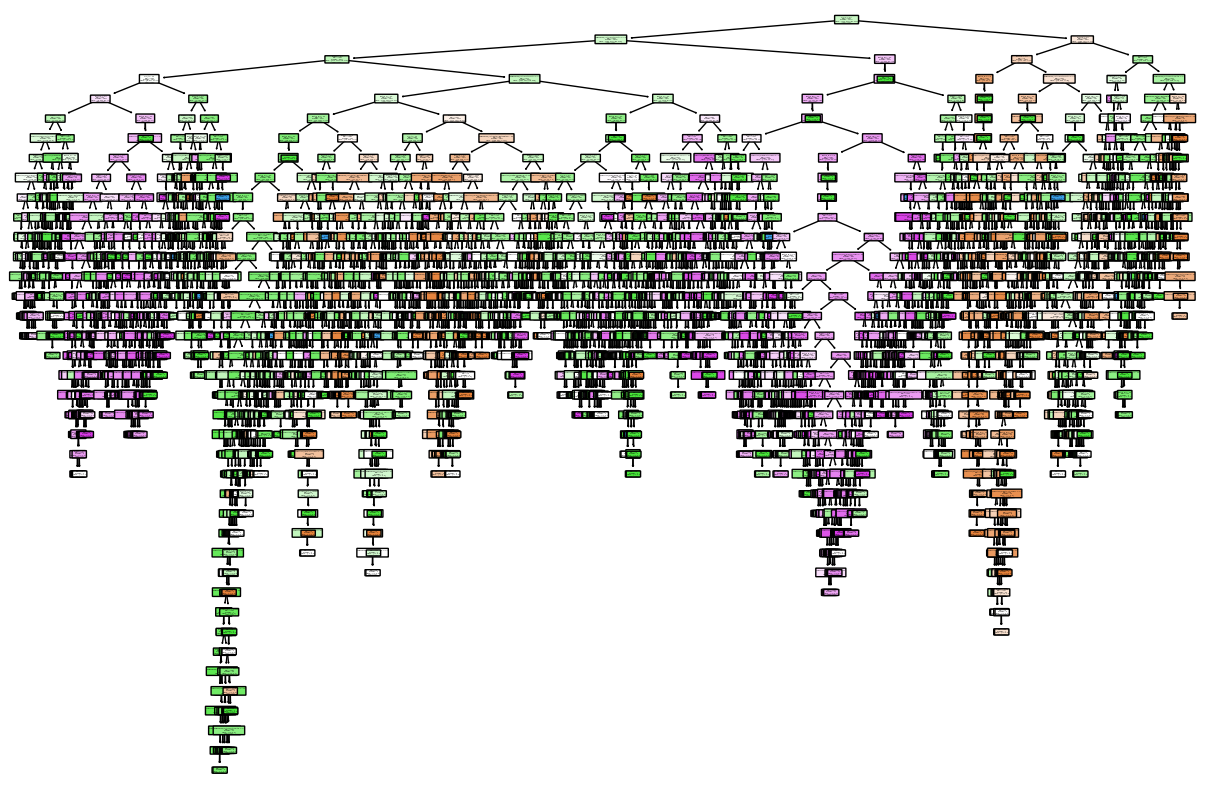

In [172]:
# Build Decision Tree Classifier Model with One-Hot Encoding
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', sklearn.tree.DecisionTreeClassifier())  # Adjust parameters as needed
])

# Train the model
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)

# Visualize Decision Tree
plt.figure(figsize=(15, 10))
tree = model.named_steps['classifier']
plot_tree(tree, feature_names=all_feature_names, class_names=[f'Bin {i+1}' for i in range(num_bins)], filled=True, rounded=True)
plt.show()

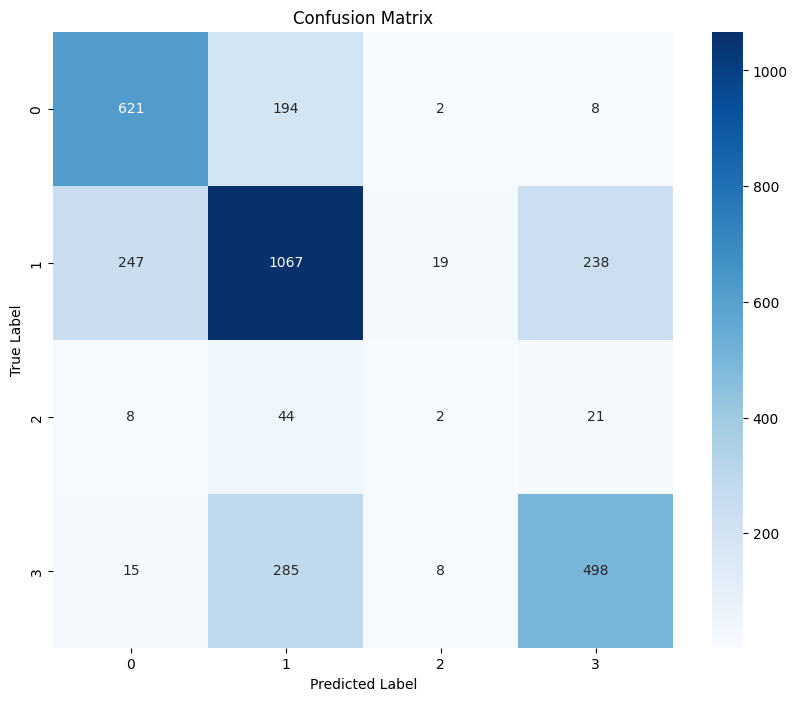

In [173]:
import seaborn as sns
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##  ***Classify to 2 Groups***

### 1. Importing Libraries

In [174]:
import numpy as np
import pandas as pd
import os
import os.path as op
import sklearn
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Import  Data

In [175]:
dir = op.join('/content/drive/My Drive/','ML','MELBOURNE_HOUSE_PRICES_LESS.xls')  # Path to the Data folder
data = pd.read_excel(dir, sheet_name='MELBOURNE_HOUSE_PRICES_LESS')
print('data type: ', type(data))
data

data type:  <class 'pandas.core.frame.DataFrame'>


Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford     49 Lithgow St      3    h  1490000.0      S   
1         Abbotsford     59A Turner St      3    h  1220000.0      S   
2         Abbotsford     119B Yarra St      3    h  1420000.0      S   
3         Aberfeldie        68 Vida St      3    h  1515000.0      S   
4       Airport West  92 Clydesdale Rd      2    h   670000.0      S   
...              ...               ...    ...  ...        ...    ...   
16378        Vermont      16 Morack Rd      3    h   831000.0      S   
16379  Vermont South   28 Fortescue Gr      5    h  1658000.0      S   
16380  Vermont South        2 Moran Ct      4    h  1160000.0      S   
16381  Vermont South       1 Sewart Cl      4    h        NaN     PN   
16382  Vermont South     126 Weeden Dr      4    h  1142000.0      S   

         SellerG       Date  Postcode             Regionname  Propertycount  \
0         Jellis 2017-01-04      3067  Northern Metropolitan           4019   
1       Marshall 2017-01-04      3067  Northern Metropolitan           4019   
2         Nelson 2017-01-04      3067  Northern Metropolitan           4019   
3          Barry 2017-01-04      3040   Western Metropolitan           1543   
4         Nelson 2017-01-04      3042   Western Metropolitan           3464   
...          ...        ...       ...                    ...            ...   
16378  Fletchers 2016-08-10      3133   Eastern Metropolitan           4181   
16379        Ray 2016-08-10      3133   Eastern Metropolitan           4280   
16380    McGrath 2016-08-10      3133   Eastern Metropolitan           4280   
16381  Harcourts 2016-08-10      3133   Eastern Metropolitan           4280   
16382     Jellis 2016-08-10      3133   Eastern Metropolitan           4280   

       Distance                 CouncilArea  
0           3.0          Yarra City Council  
1           3.0          Yarra City Council  
2           3.0          Yarra City Council  
3           7.5  Moonee Valley City Council  
4          10.4  Moonee Valley City Council  
...         ...                         ...  
16378      17.2      Maroondah City Council  
16379      17.2     Whitehorse City Council  
16380      17.2     Whitehorse City Council  
16381      17.2     Whitehorse City Council  
16382      17.2     Whitehorse City Council  

[16383 rows x 13 columns]

### 3. Prepare Data

In [176]:
columns_to_drop = ['Suburb', 'Address', 'SellerG','Postcode','Date']
data = data.drop(columns=columns_to_drop)

In [177]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [178]:
data.describe()

Rooms         Price  Propertycount      Distance
count  16383.000000  1.257100e+04   16383.000000  16383.000000
mean       3.099127  9.767911e+05    7632.868888     12.757963
std        0.957242  5.748996e+05    4451.860526      7.602112
min        1.000000  8.500000e+04      39.000000      0.000000
25%        3.000000  6.100000e+05    4294.000000      7.000000
50%        3.000000  8.200000e+05    6786.000000     11.700000
75%        4.000000  1.200000e+06   10412.000000     16.700000
max       12.000000  6.700000e+06   21650.000000     48.100000

In [179]:
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target variable
X

Rooms Type Method             Regionname  Propertycount  Distance  \
0          3    h      S  Northern Metropolitan           4019       3.0   
1          3    h      S  Northern Metropolitan           4019       3.0   
2          3    h      S  Northern Metropolitan           4019       3.0   
3          3    h      S   Western Metropolitan           1543       7.5   
4          2    h      S   Western Metropolitan           3464      10.4   
...      ...  ...    ...                    ...            ...       ...   
16378      3    h      S   Eastern Metropolitan           4181      17.2   
16379      5    h      S   Eastern Metropolitan           4280      17.2   
16380      4    h      S   Eastern Metropolitan           4280      17.2   
16381      4    h     PN   Eastern Metropolitan           4280      17.2   
16382      4    h      S   Eastern Metropolitan           4280      17.2   

                      CouncilArea  
0              Yarra City Council  
1              Yarra City Council  
2              Yarra City Council  
3      Moonee Valley City Council  
4      Moonee Valley City Council  
...                           ...  
16378      Maroondah City Council  
16379     Whitehorse City Council  
16380     Whitehorse City Council  
16381     Whitehorse City Council  
16382     Whitehorse City Council  

[16383 rows x 7 columns]

In [180]:
y = y.fillna(y.mean())

In [181]:
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

In [182]:
num_bins = 2  # Adjust the number of bins based on your preference
y_quantized, bins = pd.qcut(y, q=num_bins, labels=False, retbins=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_quantized, test_size=0.2, random_state=42)

Accuracy: 0.8138541348794629


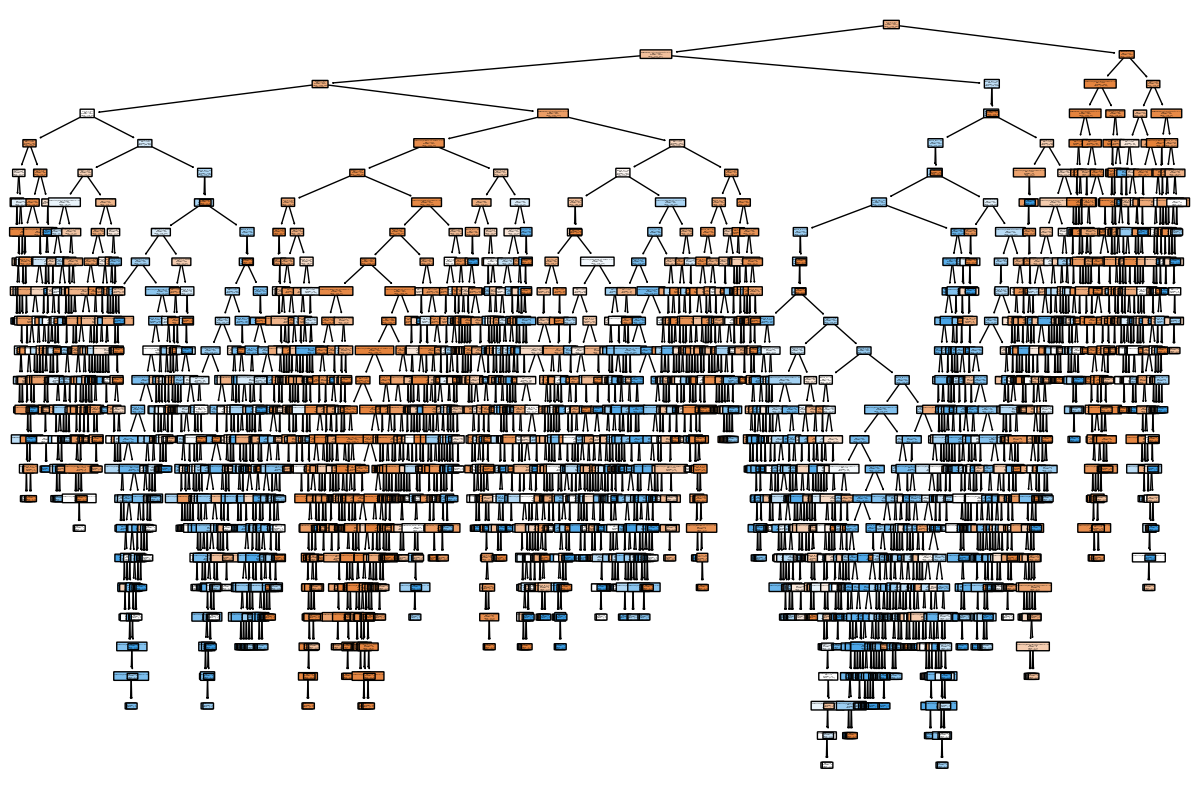

In [183]:
# Build Decision Tree Classifier Model with One-Hot Encoding
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', sklearn.tree.DecisionTreeClassifier())  # Adjust parameters as needed
])

# Train the model
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)

# Visualize Decision Tree
plt.figure(figsize=(15, 10))
tree = model.named_steps['classifier']
plot_tree(tree, feature_names=all_feature_names, class_names=[f'Bin {i+1}' for i in range(num_bins)], filled=True, rounded=True)
plt.show()

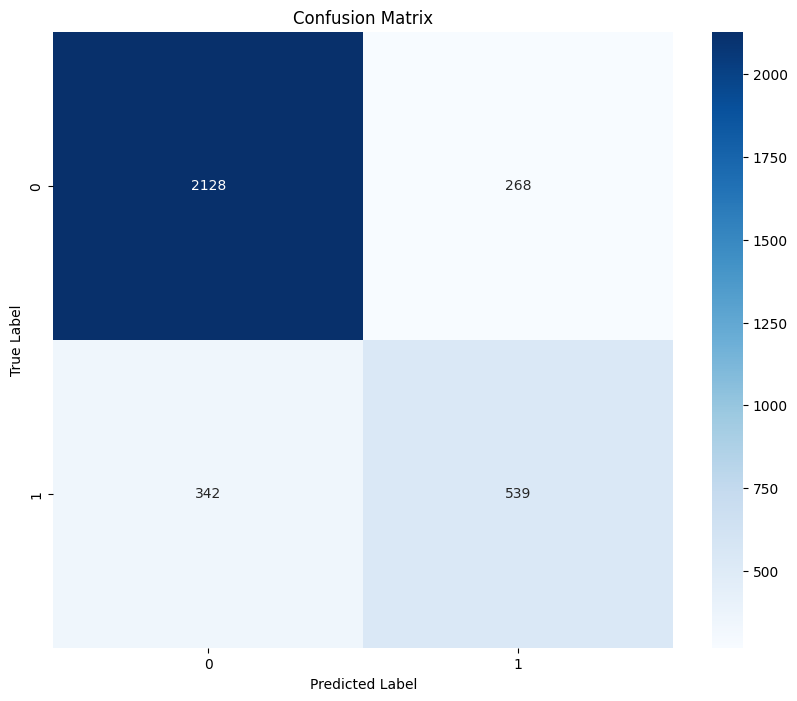

In [184]:
import seaborn as sns
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##  ***Classify to 2 Groups with Smaller Tree***

### 1. Importing Libraries

In [185]:
import numpy as np
import pandas as pd
import os
import os.path as op
import sklearn
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Import  Data

In [186]:
dir = op.join('/content/drive/My Drive/','ML','MELBOURNE_HOUSE_PRICES_LESS.xls')  # Path to the Data folder
data = pd.read_excel(dir, sheet_name='MELBOURNE_HOUSE_PRICES_LESS')
print('data type: ', type(data))
data

data type:  <class 'pandas.core.frame.DataFrame'>


Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford     49 Lithgow St      3    h  1490000.0      S   
1         Abbotsford     59A Turner St      3    h  1220000.0      S   
2         Abbotsford     119B Yarra St      3    h  1420000.0      S   
3         Aberfeldie        68 Vida St      3    h  1515000.0      S   
4       Airport West  92 Clydesdale Rd      2    h   670000.0      S   
...              ...               ...    ...  ...        ...    ...   
16378        Vermont      16 Morack Rd      3    h   831000.0      S   
16379  Vermont South   28 Fortescue Gr      5    h  1658000.0      S   
16380  Vermont South        2 Moran Ct      4    h  1160000.0      S   
16381  Vermont South       1 Sewart Cl      4    h        NaN     PN   
16382  Vermont South     126 Weeden Dr      4    h  1142000.0      S   

         SellerG       Date  Postcode             Regionname  Propertycount  \
0         Jellis 2017-01-04      3067  Northern Metropolitan           4019   
1       Marshall 2017-01-04      3067  Northern Metropolitan           4019   
2         Nelson 2017-01-04      3067  Northern Metropolitan           4019   
3          Barry 2017-01-04      3040   Western Metropolitan           1543   
4         Nelson 2017-01-04      3042   Western Metropolitan           3464   
...          ...        ...       ...                    ...            ...   
16378  Fletchers 2016-08-10      3133   Eastern Metropolitan           4181   
16379        Ray 2016-08-10      3133   Eastern Metropolitan           4280   
16380    McGrath 2016-08-10      3133   Eastern Metropolitan           4280   
16381  Harcourts 2016-08-10      3133   Eastern Metropolitan           4280   
16382     Jellis 2016-08-10      3133   Eastern Metropolitan           4280   

       Distance                 CouncilArea  
0           3.0          Yarra City Council  
1           3.0          Yarra City Council  
2           3.0          Yarra City Council  
3           7.5  Moonee Valley City Council  
4          10.4  Moonee Valley City Council  
...         ...                         ...  
16378      17.2      Maroondah City Council  
16379      17.2     Whitehorse City Council  
16380      17.2     Whitehorse City Council  
16381      17.2     Whitehorse City Council  
16382      17.2     Whitehorse City Council  

[16383 rows x 13 columns]

### 3. Prepare Data

In [187]:
columns_to_drop = ['Suburb', 'Address', 'SellerG','Postcode','Date']
data = data.drop(columns=columns_to_drop)

In [188]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [189]:
data.describe()

Rooms         Price  Propertycount      Distance
count  16383.000000  1.257100e+04   16383.000000  16383.000000
mean       3.099127  9.767911e+05    7632.868888     12.757963
std        0.957242  5.748996e+05    4451.860526      7.602112
min        1.000000  8.500000e+04      39.000000      0.000000
25%        3.000000  6.100000e+05    4294.000000      7.000000
50%        3.000000  8.200000e+05    6786.000000     11.700000
75%        4.000000  1.200000e+06   10412.000000     16.700000
max       12.000000  6.700000e+06   21650.000000     48.100000

In [190]:
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target variable
X

Rooms Type Method             Regionname  Propertycount  Distance  \
0          3    h      S  Northern Metropolitan           4019       3.0   
1          3    h      S  Northern Metropolitan           4019       3.0   
2          3    h      S  Northern Metropolitan           4019       3.0   
3          3    h      S   Western Metropolitan           1543       7.5   
4          2    h      S   Western Metropolitan           3464      10.4   
...      ...  ...    ...                    ...            ...       ...   
16378      3    h      S   Eastern Metropolitan           4181      17.2   
16379      5    h      S   Eastern Metropolitan           4280      17.2   
16380      4    h      S   Eastern Metropolitan           4280      17.2   
16381      4    h     PN   Eastern Metropolitan           4280      17.2   
16382      4    h      S   Eastern Metropolitan           4280      17.2   

                      CouncilArea  
0              Yarra City Council  
1              Yarra City Council  
2              Yarra City Council  
3      Moonee Valley City Council  
4      Moonee Valley City Council  
...                           ...  
16378      Maroondah City Council  
16379     Whitehorse City Council  
16380     Whitehorse City Council  
16381     Whitehorse City Council  
16382     Whitehorse City Council  

[16383 rows x 7 columns]

In [191]:
y = y.fillna(y.mean())

In [192]:
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

In [193]:
num_bins = 2  # Adjust the number of bins based on your preference
y_quantized, bins = pd.qcut(y, q=num_bins, labels=False, retbins=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_quantized, test_size=0.2, random_state=42)

Accuracy: 0.7894415624046384


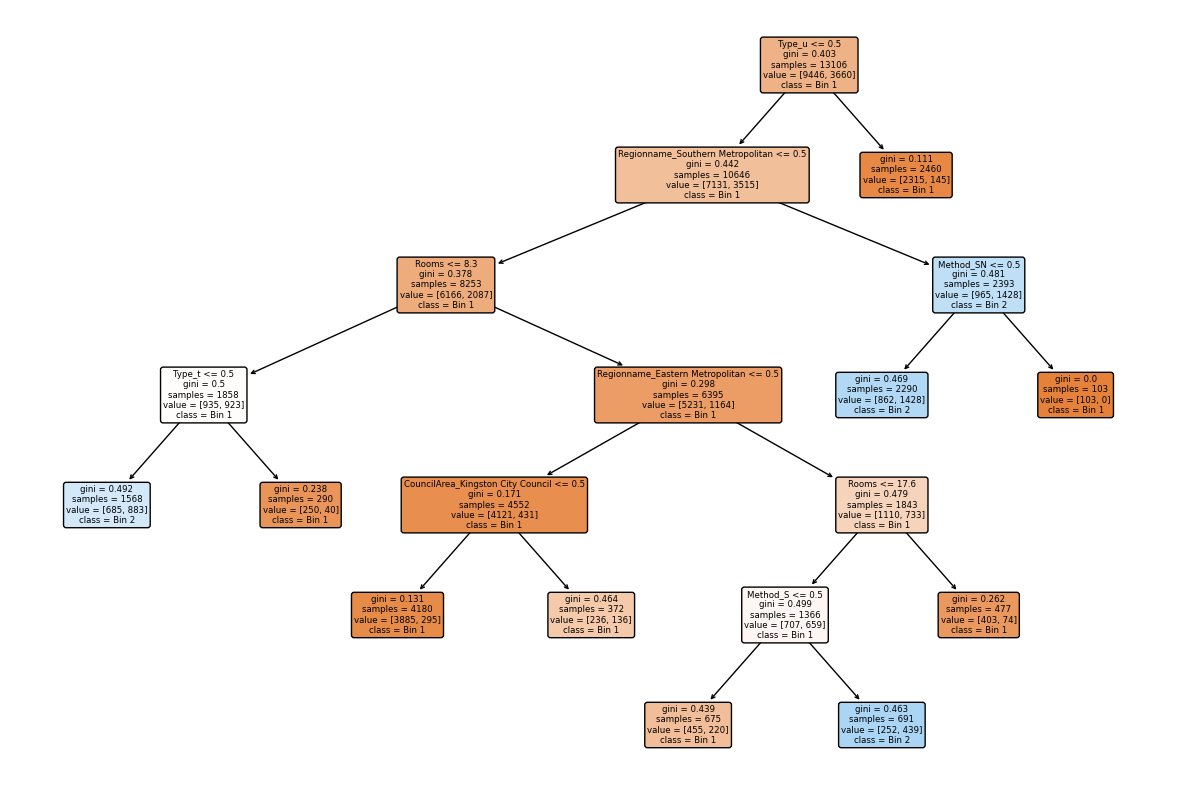

In [194]:
# Build Decision Tree Classifier Model with One-Hot Encoding
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', sklearn.tree.DecisionTreeClassifier(max_depth =10, max_leaf_nodes=10))  # Adjust parameters as needed
])

# Train the model
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)

# Visualize Decision Tree
plt.figure(figsize=(15, 10))
tree = model.named_steps['classifier']
plot_tree(tree, feature_names=all_feature_names, class_names=[f'Bin {i+1}' for i in range(num_bins)], filled=True, rounded=True)
plt.show()

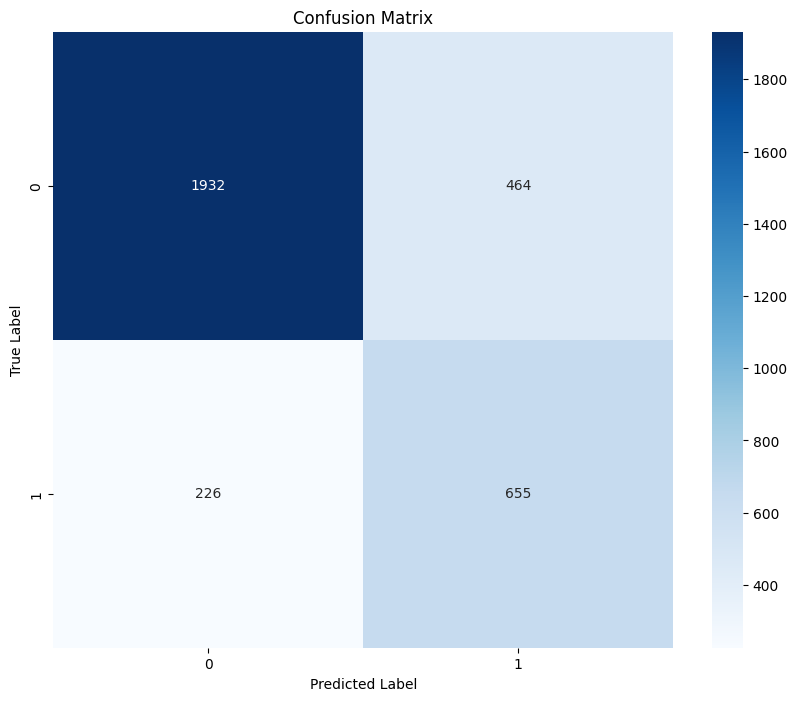

In [195]:
import seaborn as sns
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()